# Расширенный анализ моделей с методом Монте-Карло

# Описание проекта

В данном проекте проводится сравнение регрессионных моделей с применением метода Монте-Карло на нескольких реальных датасетах. Оценивается устойчивость моделей, их предсказательная способность и вариативность результатов.

# Задача
Обучить модели
* Gradient Boosting,
* XGBoost,
* CatBoost,
* Ridge Regression,
* Lasso Regression,
* ElasticNet,

используя реальные данные, применить метод Монте-Карло для улучшения стабильности предсказаний и провести анализ качества результатов.

In [1]:
!pip install catboost


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install openpyxl


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes, fetch_california_housing
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from xgboost import XGBRegressor
from catboost import CatBoostRegressor

**Diabetes Dataset**
Датасет: Diabetes
 - Размер X: (442, 10)
 - Пропущенные значения: 0 признаков, 0 в целевой переменной
 - Целевая переменная: min=25.00, max=346.00, mean=152.13, std=77.01


count          mean       std       min       25%       50%       75%  \
age  442.0 -2.511817e-19  0.047619 -0.107226 -0.037299  0.005383  0.038076   
sex  442.0  1.230790e-17  0.047619 -0.044642 -0.044642 -0.044642  0.050680   
bmi  442.0 -2.245564e-16  0.047619 -0.090275 -0.034229 -0.007284  0.031248   
bp   442.0 -4.797570e-17  0.047619 -0.112399 -0.036656 -0.005670  0.035644   
s1   442.0 -1.381499e-17  0.047619 -0.126781 -0.034248 -0.004321  0.028358   
s2   442.0  3.918434e-17  0.047619 -0.115613 -0.030358 -0.003819  0.029844   
s3   442.0 -5.777179e-18  0.047619 -0.102307 -0.035117 -0.006584  0.029312   
s4   442.0 -9.042540e-18  0.047619 -0.076395 -0.039493 -0.002592  0.034309   
s5   442.0  9.293722e-17  0.047619 -0.126097 -0.033246 -0.001947  0.032432   
s6   442.0  1.130318e-17  0.047619 -0.137767 -0.033179 -0.001078  0.027917   

          max  
age  0.110727  
sex  0.050680  
bmi  0.170555  
bp   0.132044  
s1   0.153914  
s2   0.198788  
s3   0.181179  
s4   0.185234  
s5   0.133597  
s6   0.135612

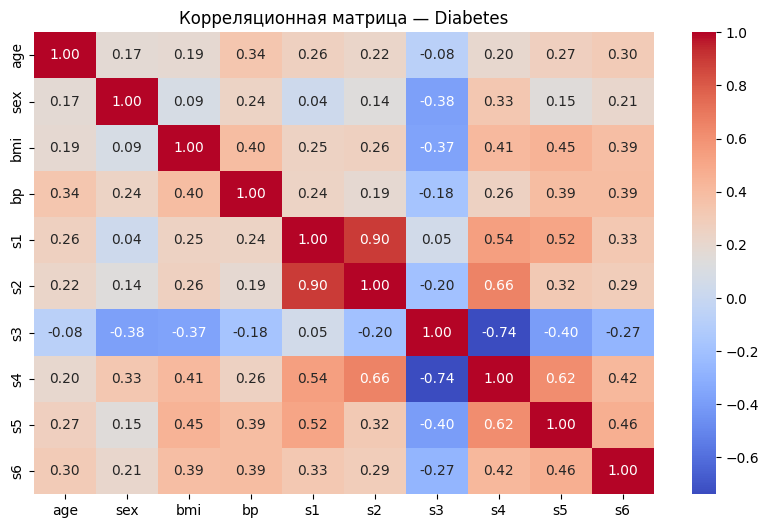

**California Housing Dataset**
Датасет: California Housing
 - Размер X: (20640, 8)
 - Пропущенные значения: 0 признаков, 0 в целевой переменной
 - Целевая переменная: min=14999.00, max=500001.00, mean=206855.82, std=115392.82


count         mean          std         min         25%  \
MedInc      20640.0     3.870671     1.899822    0.499900    2.563400   
HouseAge    20640.0    28.639486    12.585558    1.000000   18.000000   
AveRooms    20640.0     5.429000     2.474173    0.846154    4.440716   
AveBedrms   20640.0     1.096675     0.473911    0.333333    1.006079   
Population  20640.0  1425.476744  1132.462122    3.000000  787.000000   
AveOccup    20640.0     3.070655    10.386050    0.692308    2.429741   
Latitude    20640.0    35.631861     2.135952   32.540000   33.930000   
Longitude   20640.0  -119.569704     2.003532 -124.350000 -121.800000   

                    50%          75%           max  
MedInc         3.534800     4.743250     15.000100  
HouseAge      29.000000    37.000000     52.000000  
AveRooms       5.229129     6.052381    141.909091  
AveBedrms      1.048780     1.099526     34.066667  
Population  1166.000000  1725.000000  35682.000000  
AveOccup       2.818116     3.282261   1243.333333  
Latitude      34.260000    37.710000     41.950000  
Longitude   -118.490000  -118.010000   -114.310000

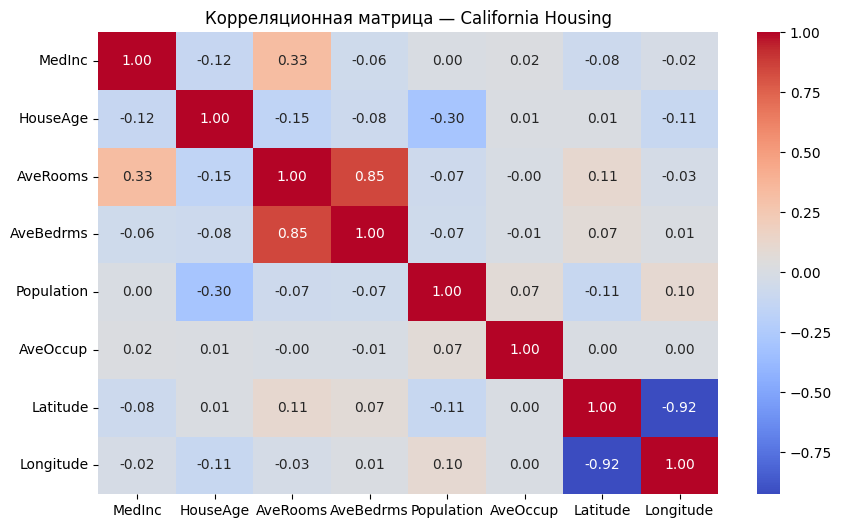

**Energy Efficiency Dataset**
Датасет: Energy Efficiency
 - Размер X: (768, 8)
 - Пропущенные значения: 0 признаков, 0 в целевой переменной
 - Целевая переменная: min=6.01, max=43.10, mean=22.31, std=10.08


count        mean        std     min       25%     50%      75%     max
X1  768.0    0.764167   0.105777    0.62    0.6825    0.75    0.830    0.98
X2  768.0  671.708333  88.086116  514.50  606.3750  673.75  741.125  808.50
X3  768.0  318.500000  43.626481  245.00  294.0000  318.50  343.000  416.50
X4  768.0  176.604167  45.165950  110.25  140.8750  183.75  220.500  220.50
X5  768.0    5.250000   1.751140    3.50    3.5000    5.25    7.000    7.00
X6  768.0    3.500000   1.118763    2.00    2.7500    3.50    4.250    5.00
X7  768.0    0.234375   0.133221    0.00    0.1000    0.25    0.400    0.40
X8  768.0    2.812500   1.550960    0.00    1.7500    3.00    4.000    5.00

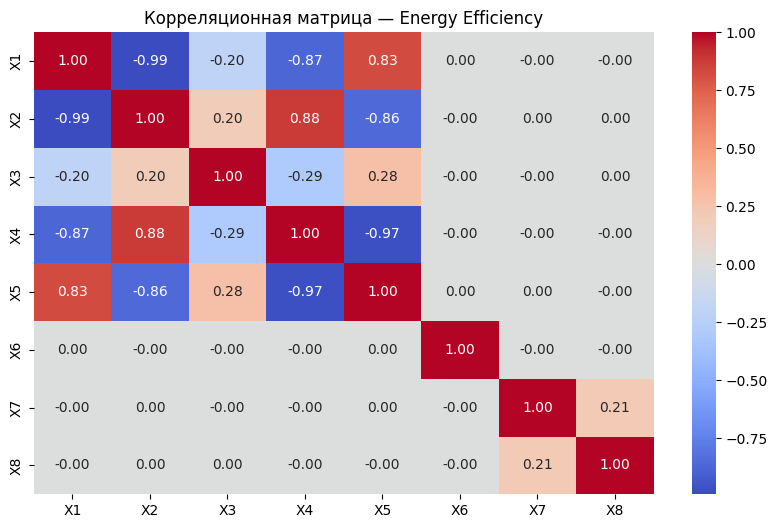

In [4]:
# Описание и начальный анализ датасетов
def describe_dataset(name, X, y, pairplot_sample=False):
    print(f"Датасет: {name}")
    print(f" - Размер X: {X.shape}")
    print(f" - Пропущенные значения: {X.isnull().sum().sum()} признаков, {pd.isnull(y).sum()} в целевой переменной")
    print(f" - Целевая переменная: min={np.min(y):.2f}, max={np.max(y):.2f}, mean={np.mean(y):.2f}, std={np.std(y):.2f}")
    display(X.describe().T)

    corr = X.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Корреляционная матрица — {name}')
    plt.show()

# === DIABETES ===
data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
print("**Diabetes Dataset**")

describe_dataset("Diabetes", X, y, pairplot_sample=True)

# === CALIFORNIA HOUSING ===
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target * 100000
print("**California Housing Dataset**")

describe_dataset("California Housing", X, y, pairplot_sample=False)

# === ENERGY EFFICIENCY ===
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
df = pd.read_excel(url)
X = df.iloc[:, :-2]
y = df.iloc[:, -2]  # Heating Load
print("**Energy Efficiency Dataset**")

describe_dataset("Energy Efficiency", X, y, pairplot_sample=True)

1. Diabetes Dataset
Источник: sklearn.datasets.load_diabetes()

Описание:
Медицинский регрессионный датасет, содержащий данные о 442 пациентах с диабетом. Цель — предсказать количественную оценку прогрессирования диабета через год после начала наблюдения на основе 10 медицинских признаков.

Признаки (X):

* age — возраст

* sex — пол

* bmi — индекс массы тела

* bp — среднее артериальное давление

* s1–s6 — различные показатели крови (например, уровень глюкозы, холестерин)

Целевая переменная (y): степень прогрессирования диабета (непрерывная)

Особенности:

* Маленький размер (442 строки)

* Все признаки числовые


2. California Housing Dataset
Источник: sklearn.datasets.fetch_california_housing()

Описание:
Данные о жилой недвижимости в Калифорнии, собранные в 1990 году. Цель — предсказать медианную стоимость домов в округе.

Признаки (X):

* MedInc — медианный доход в округе

* HouseAge — средний возраст домов

* AveRooms — среднее число комнат

* AveBedrms — среднее число спален

* Population — Общее количество жителей в районе

* AveOccup — Среднее количество жителей на один дом (плотность заселения)

* Latitude — Географическая широта района (от 32 до 42, юг → север Калифорнии)

* Longitude — Географическая долгота района (от -124 до -114, запад → восток)

Целевая переменная (y): медианная стоимость домов (в $100,000)

Особенности:

* Большой размер (~20,000 строк)

* Все признаки числовые

* Чувствителен к переобучению

* Хорошо подходит для моделей бустинга

3. Energy Efficiency Dataset
Источник: UCI ML Repository

Описание:
Цель — спрогнозировать теплопотери зданий в зависимости от архитектурных характеристик.

Признаки (X):

* Relative Compactness — относительная компактность

* Surface Area — площадь поверхности

* Wall Area — площадь стен

* Roof Area — площадь крыши

* Overall Height — общая высота

* Orientation — ориентация

* Glazing Area — площадь остекления

* Glazing Area Distribution — распределение остекления

Целевая переменная (y): теплопотери (Heating Load)

Особенности:

* Компактный (768 строк)

* Хорошо выраженные зависимости между признаками и целевой переменной

In [30]:
# Монте-Карло симуляции
def monte_carlo_simulation(model, X_train, y_train, X_test, n_simulations=100):
    preds = np.zeros((n_simulations, X_test.shape[0]))
    for i in range(n_simulations):
        idx = np.random.choice(len(X_train), size=len(X_train), replace=True)
        model.fit(X_train[idx], y_train[idx])
        preds[i] = model.predict(X_test)
    return preds

In [6]:
# Оценка модели + Монте-Карло
def evaluate_model(name, model, X_train, y_train, X_test, y_test, sims=[30, 50, 100, 150]):
    model.fit(X_train, y_train)
    base_pred = model.predict(X_test)
    base_mse = mean_squared_error(y_test, base_pred)
    base_r2 = r2_score(y_test, base_pred)

    print(f"Модель: {name}")
    print(f"  Без MC -- MSE: {base_mse:.2f}, R²: {base_r2:.2f}")

    results = []
    for n in sims:
        preds_mc = monte_carlo_simulation(model, X_train, y_train, X_test, n_simulations=n)
        mean_pred = preds_mc.mean(axis=0)
        std_pred = preds_mc.std(axis=0)

        mse = mean_squared_error(y_test, mean_pred)
        r2 = r2_score(y_test, mean_pred)

        results.append({
            "Модель": name,
            "MC Симуляций": n,
            "MSE": mse,
            "R²": r2
        })

        # График
        plt.figure(figsize=(10, 4))
        idx = np.argsort(y_test)
        plt.plot(y_test[idx], label="Истинное", color='black')
        plt.plot(mean_pred[idx], label=f"Предсказание (MC={n})", color='blue')
        plt.fill_between(
            range(len(y_test)),
            mean_pred[idx] - std_pred[idx],
            mean_pred[idx] + std_pred[idx],
            color='blue',
            alpha=0.2,
            label="Дов. интервал"
        )
        plt.title(f"{name} — MC={n}")
        plt.xlabel("Наблюдение (отсортированно по y)")
        plt.ylabel("Целевая переменная")
        plt.legend()
        plt.grid(True)
        plt.show()

    return pd.DataFrame(results)

In [7]:
# Загрузка и предобработка датасетов

def load_and_preprocess(dataset="diabetes"):
    if dataset == "diabetes":
        data = load_diabetes()
        X = pd.DataFrame(data.data, columns=data.feature_names)
        y = data.target

    elif dataset == "california":
        data = fetch_california_housing()
        X = pd.DataFrame(data.data, columns=data.feature_names)
        y = data.target * 100000  # преобразуем в доллары

    elif dataset == "energy":
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
        df = pd.read_excel(url)
        X = df.iloc[:, :-2]  # первые 8 признаков
        y = df.iloc[:, -2]   # целевая переменная: теплопотери

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, np.array(y_train), np.array(y_test)

In [32]:
# Модели для тестирования
models = {
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=0),
    "CatBoost": CatBoostRegressor(verbose=False, random_state=0),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=0),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1)
}



=== Датасет: DIABETES ===
Модель: ElasticNet
  Без MC -- MSE: 2866.46, R²: 0.46


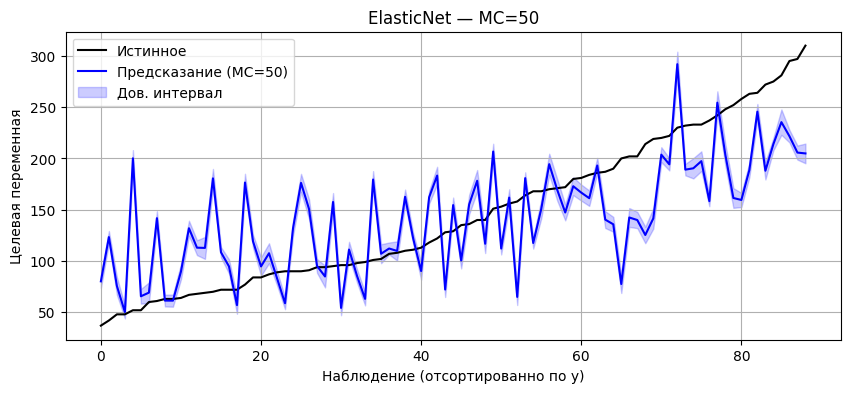

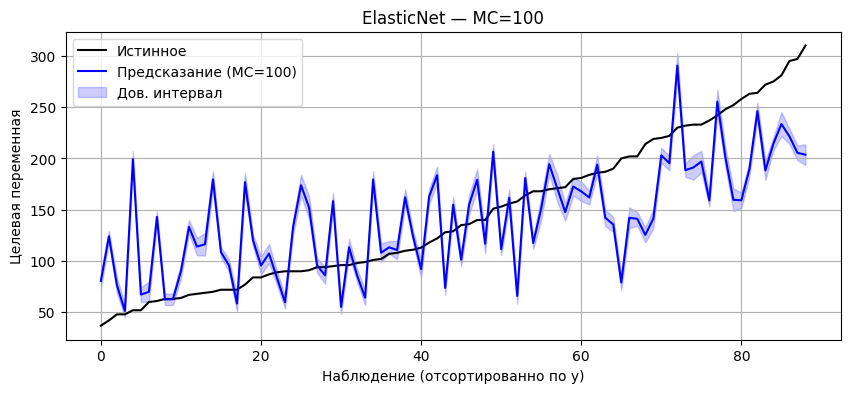

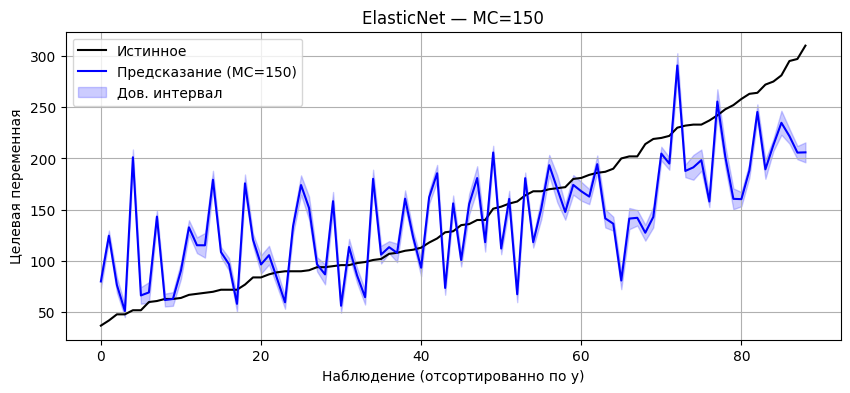

Модель: CatBoost
  Без MC -- MSE: 2763.00, R²: 0.48


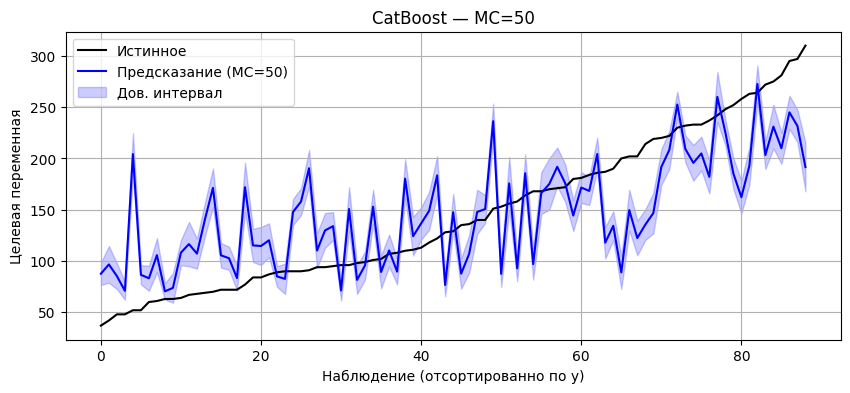

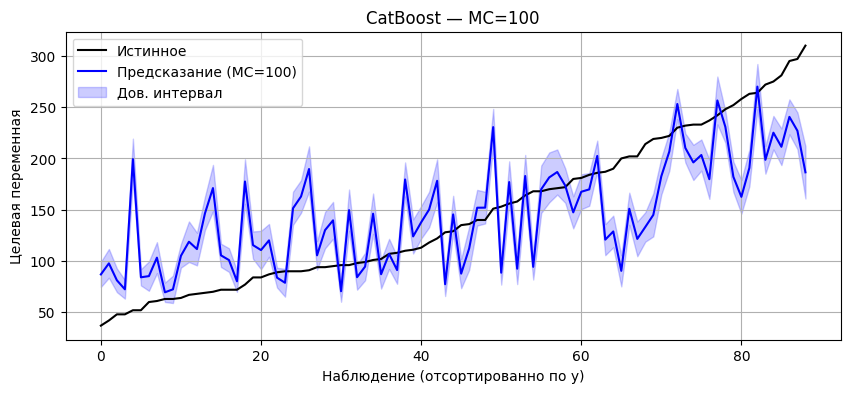

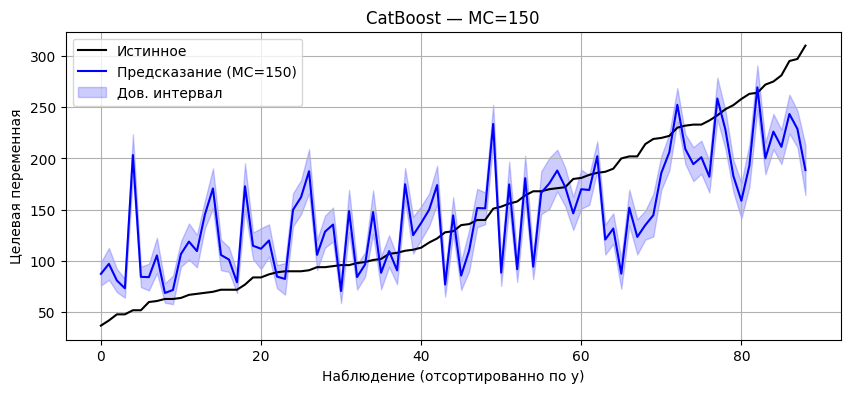

Модель: XGBoost
  Без MC -- MSE: 3393.57, R²: 0.36


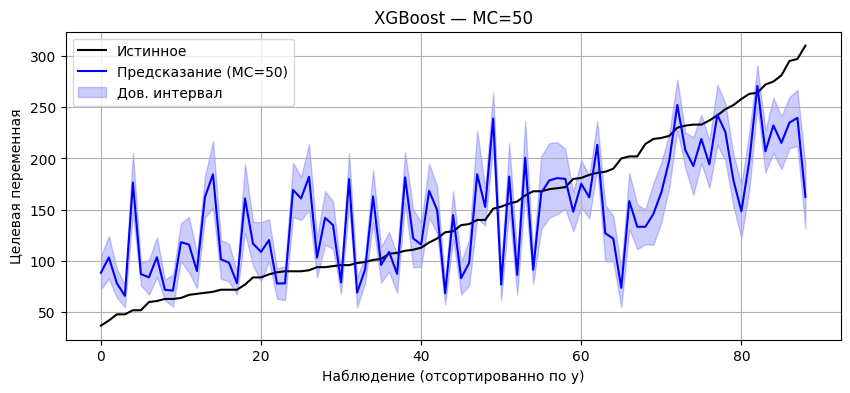

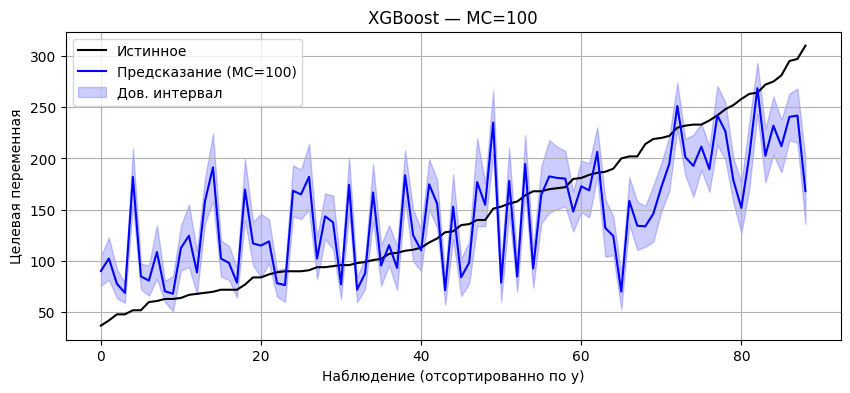

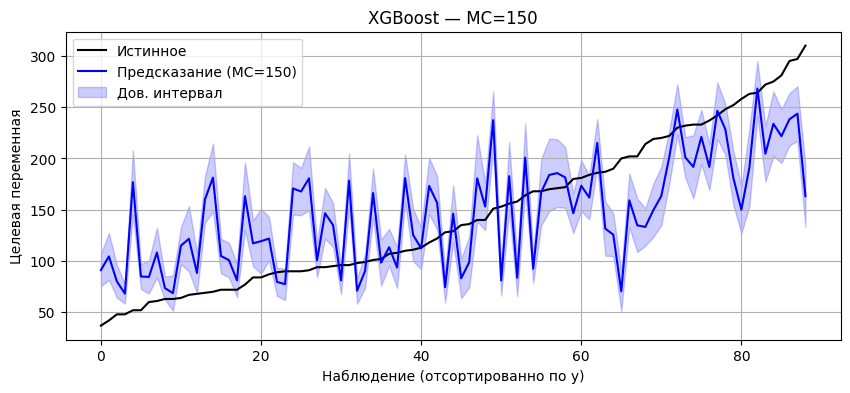

Модель: GradientBoosting
  Без MC -- MSE: 2922.29, R²: 0.45


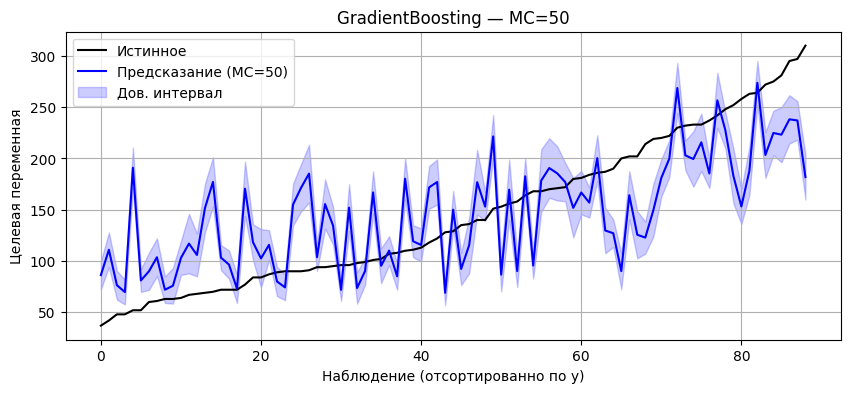

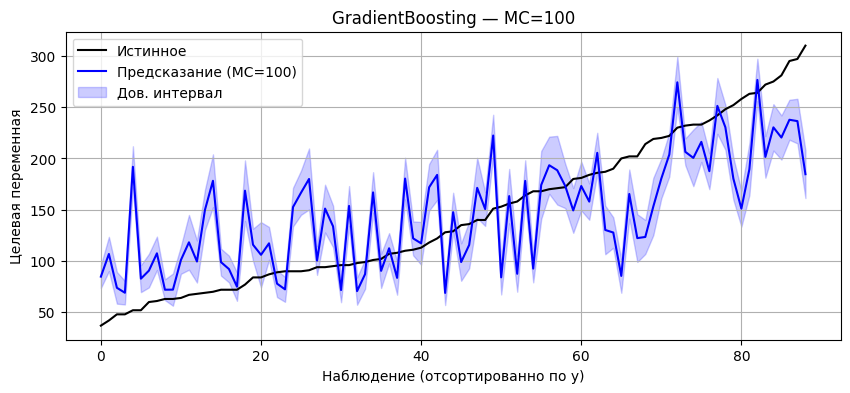

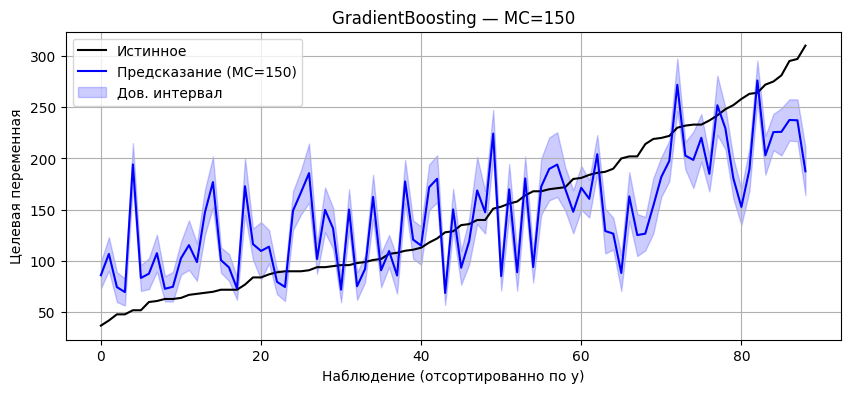

Модель: Ridge
  Без MC -- MSE: 2892.01, R²: 0.45


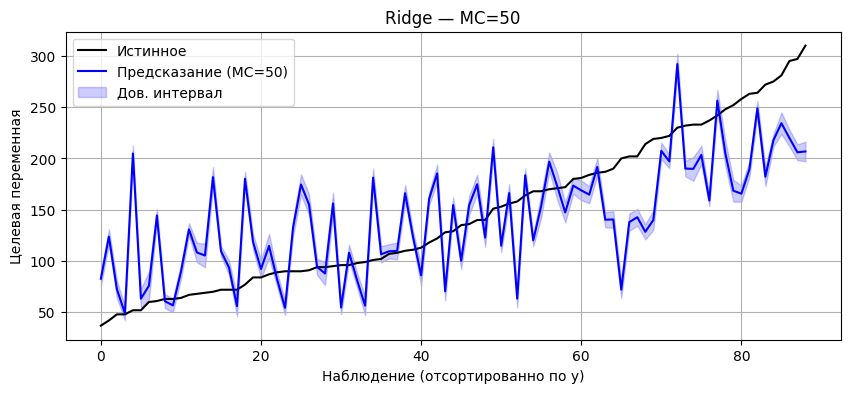

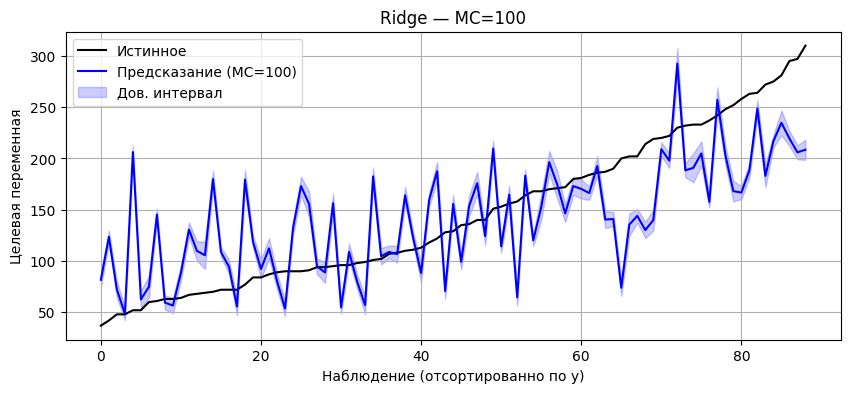

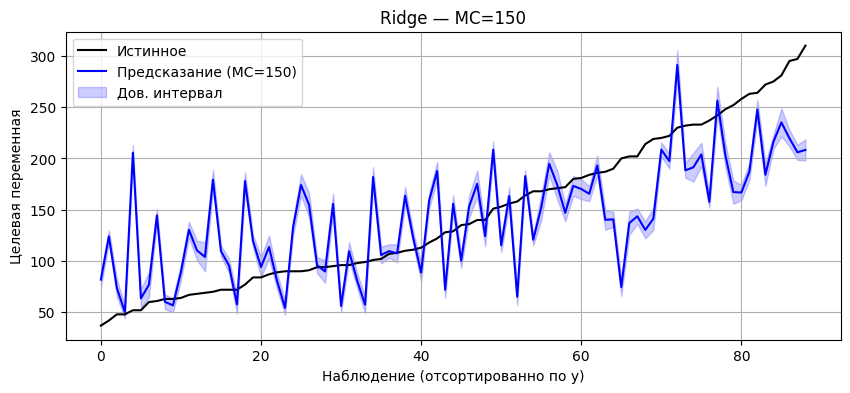

Модель: Lasso
  Без MC -- MSE: 2884.62, R²: 0.46


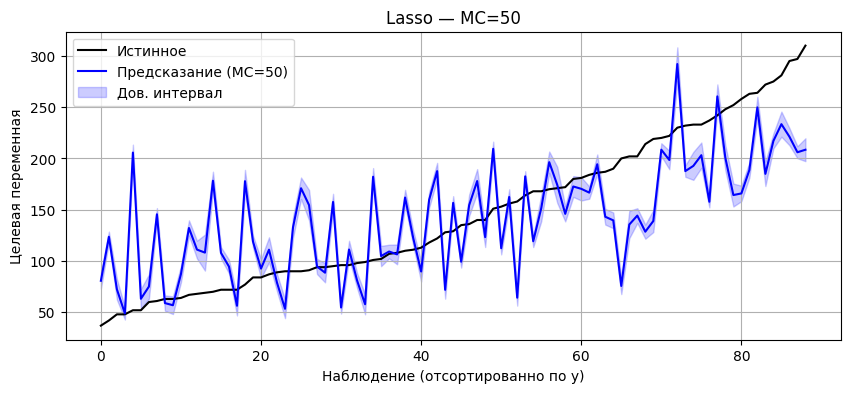

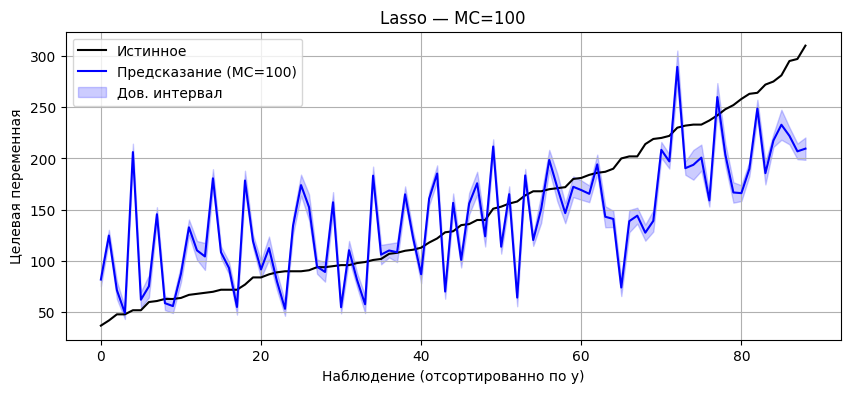

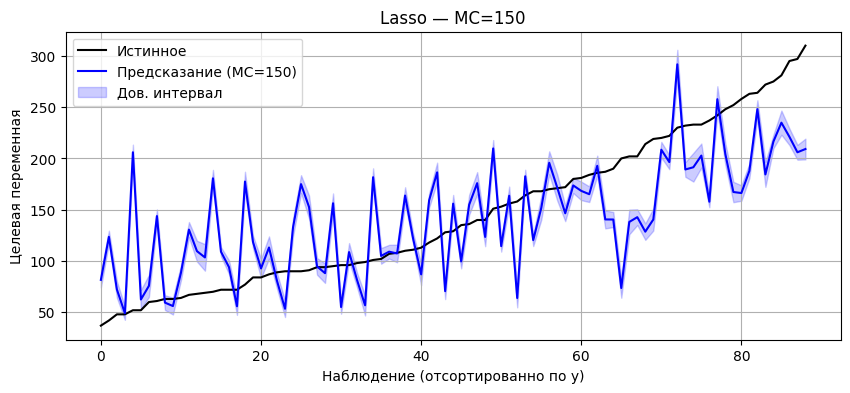

In [11]:
# Запуск анализа для каждого датасета
all_results = []


print(f"\n\n=== Датасет: {"diabetes".upper()} ===")
X_train, X_test, y_train, y_test = load_and_preprocess("diabetes")

for name, model in models.items():
    df_result = evaluate_model(name, model, X_train, y_train, X_test, y_test, sims=[50, 100, 150])
    df_result["Датасет"] = "diabetes"
    all_results.append(df_result)



=== Датасет: CALIFORNIA ===
Модель: ElasticNet
  Без MC -- MSE: 5616614340.12, R²: 0.57


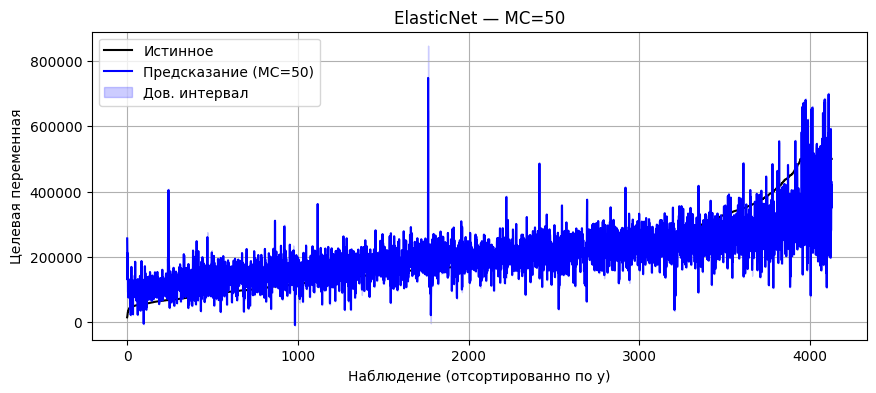

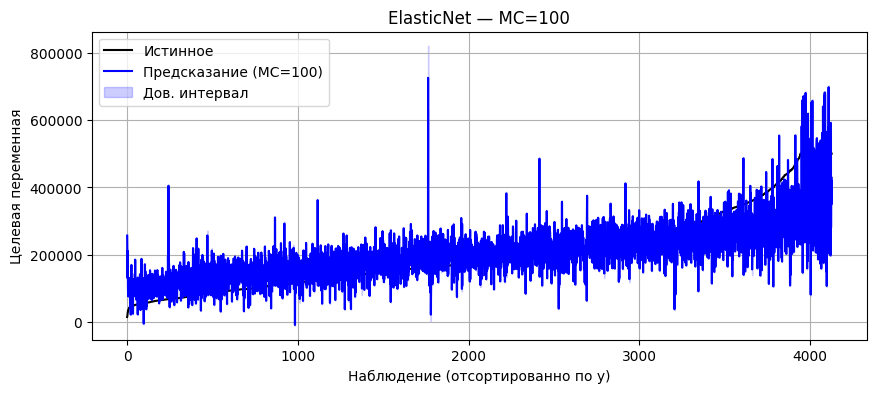

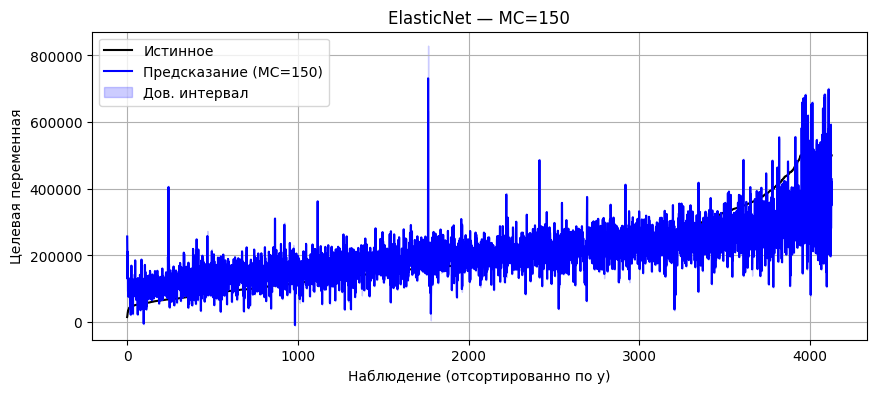

Модель: CatBoost
  Без MC -- MSE: 1976081449.19, R²: 0.85


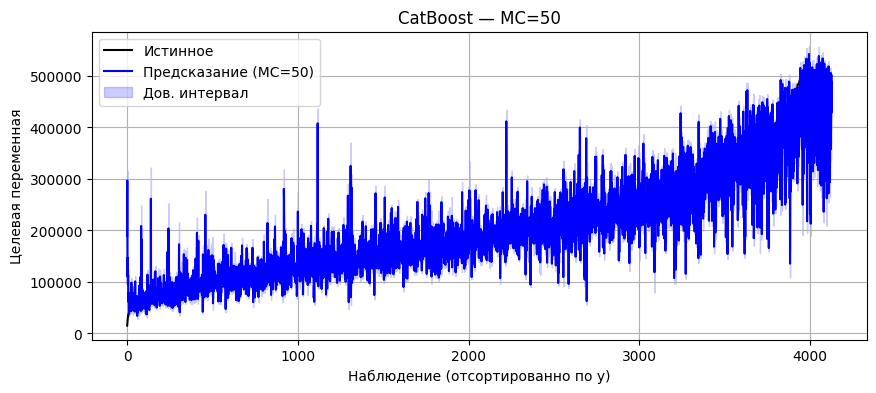

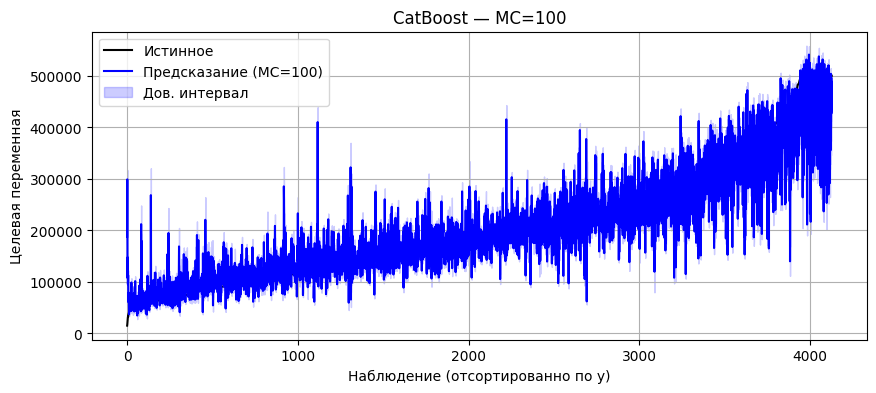

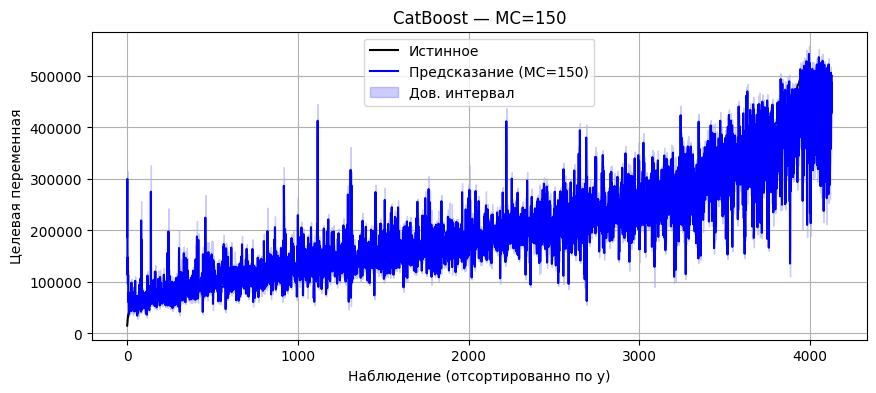

Модель: XGBoost
  Без MC -- MSE: 2272622794.31, R²: 0.83


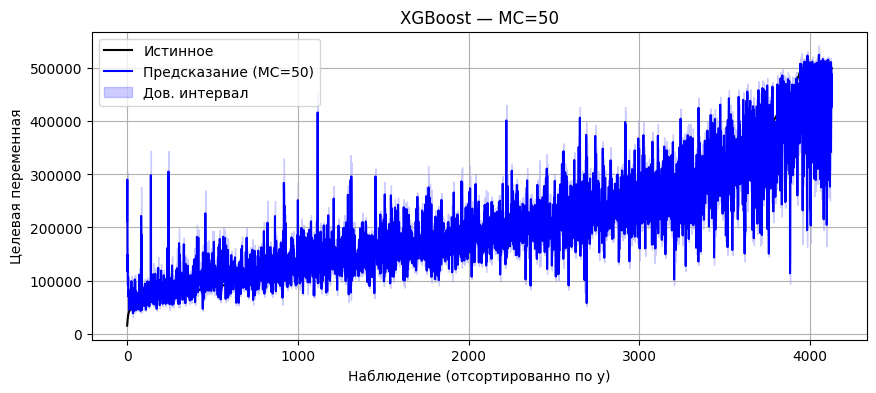

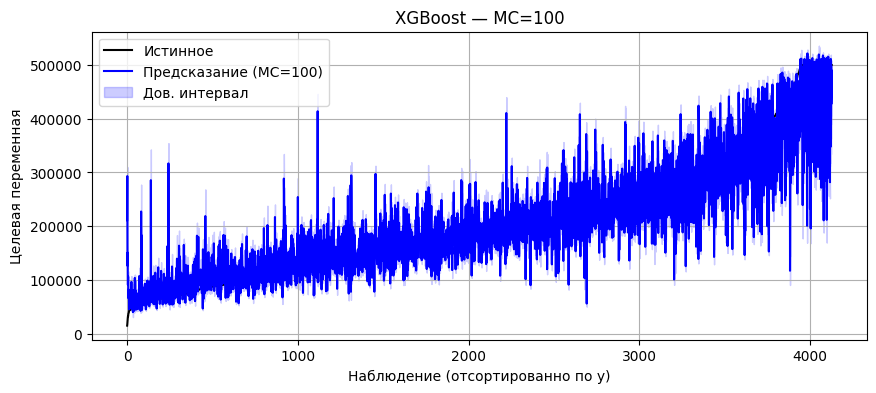

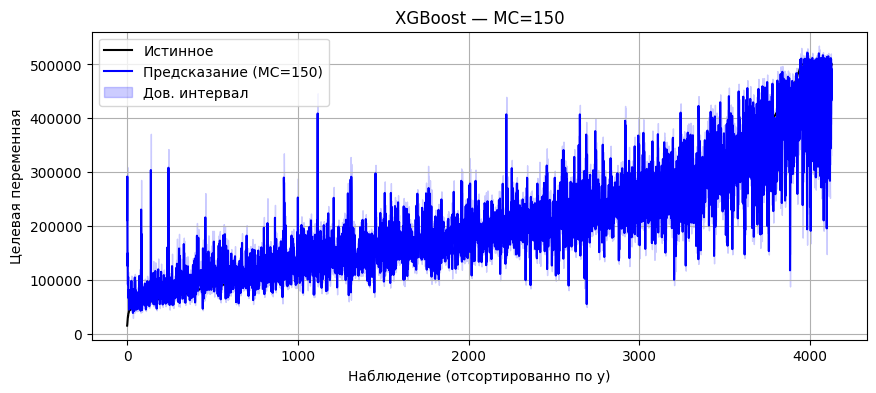

Модель: GradientBoosting
  Без MC -- MSE: 2939990124.25, R²: 0.78


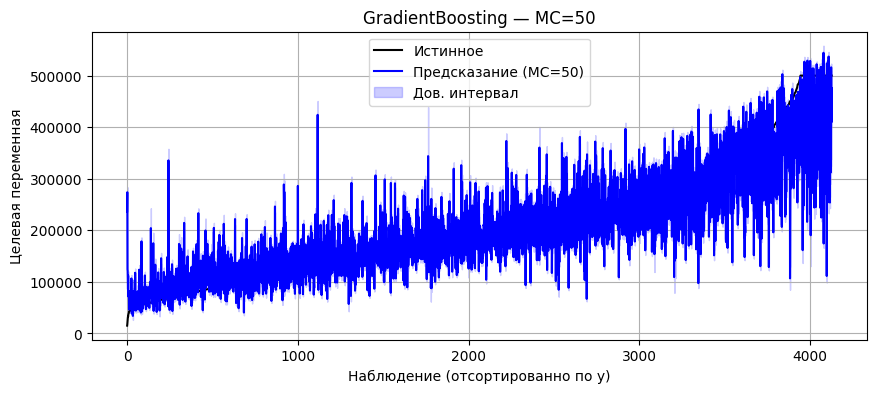

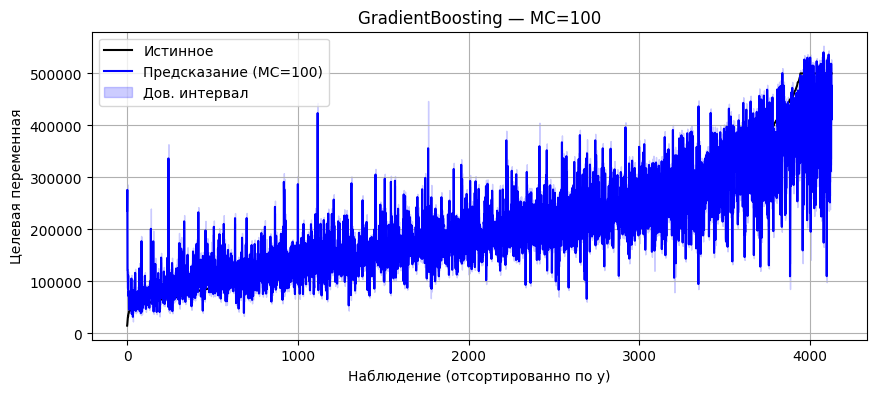

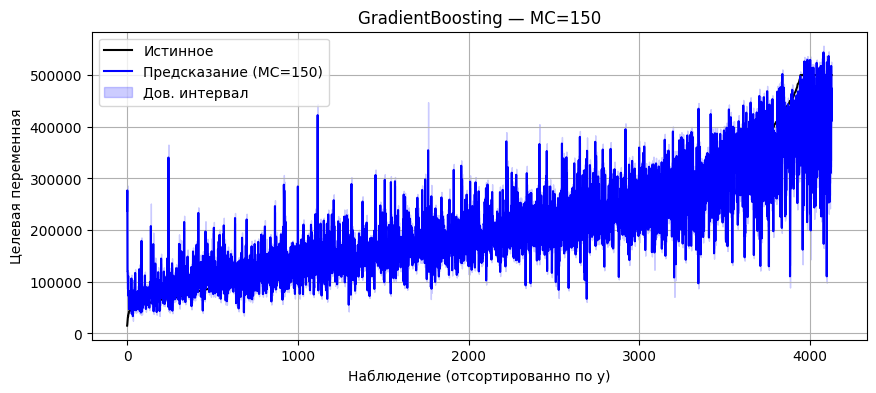

Модель: Ridge
  Без MC -- MSE: 5558548589.44, R²: 0.58


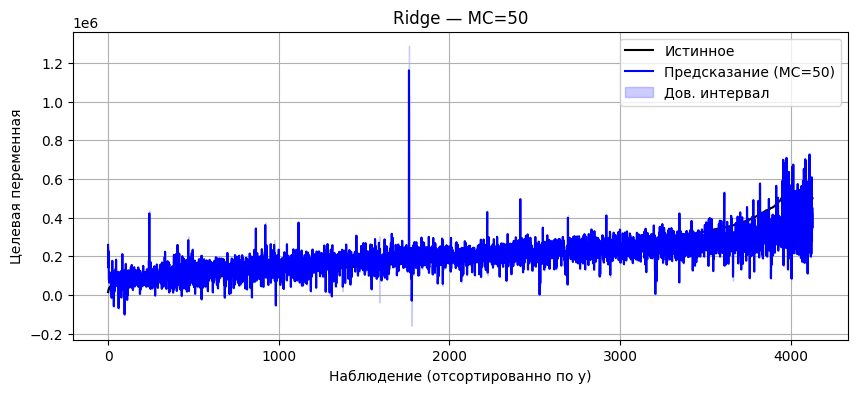

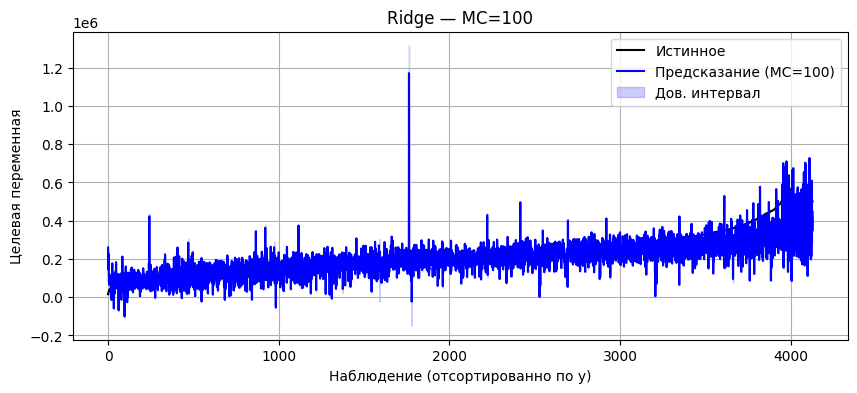

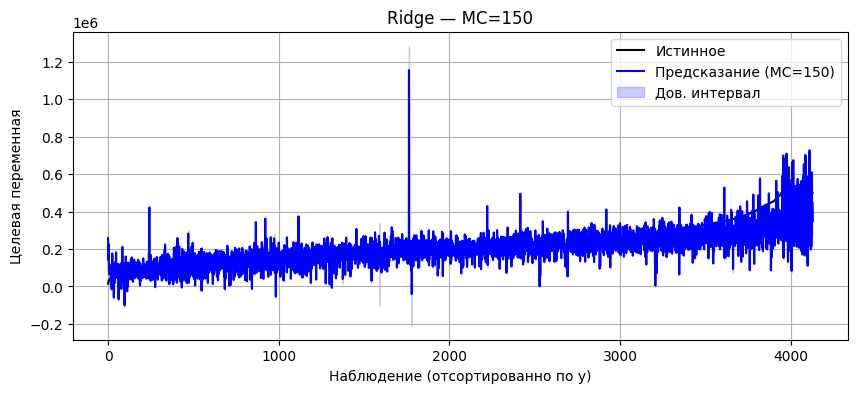

Модель: Lasso
  Без MC -- MSE: 5558901267.48, R²: 0.58


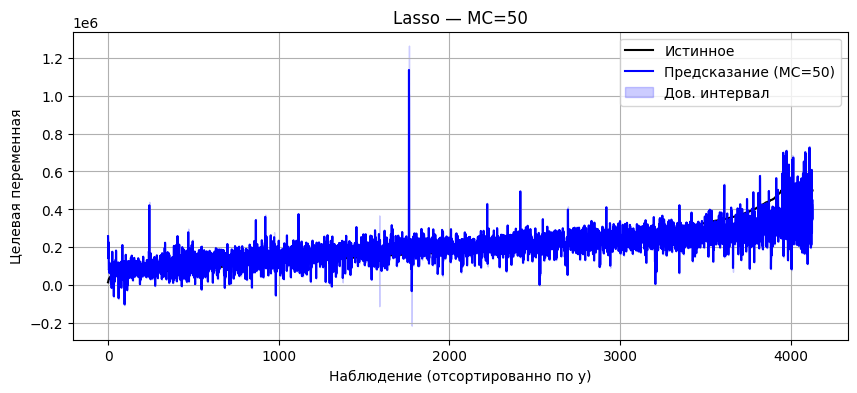

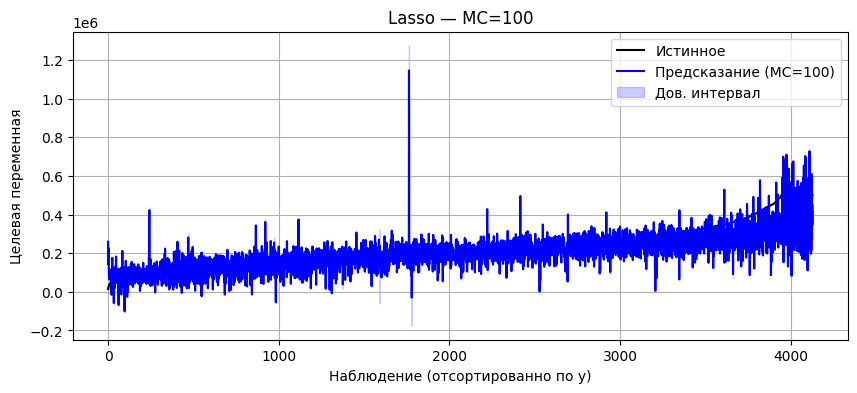

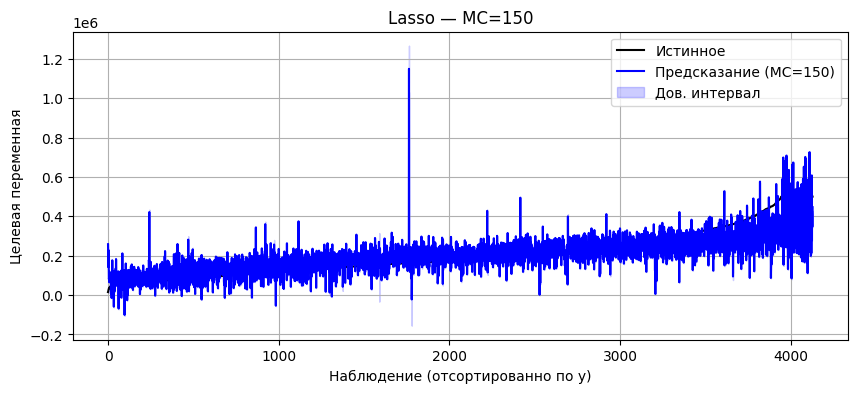

In [12]:
print(f"\n\n=== Датасет: {"california".upper()} ===")
X_train, X_test, y_train, y_test = load_and_preprocess("california")

for name, model in models.items():
    df_result = evaluate_model(name, model, X_train, y_train, X_test, y_test, sims=[50, 100, 150])
    df_result["Датасет"] = "california"
    all_results.append(df_result)



=== Датасет: ENERGY ===
Модель: ElasticNet
  Без MC -- MSE: 10.83, R²: 0.90


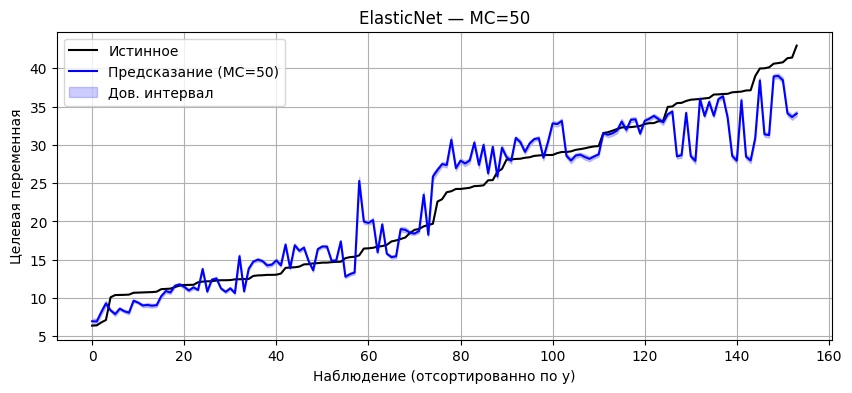

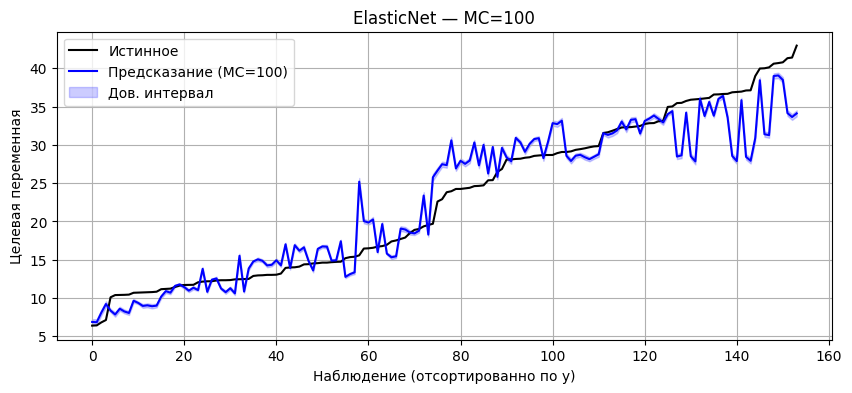

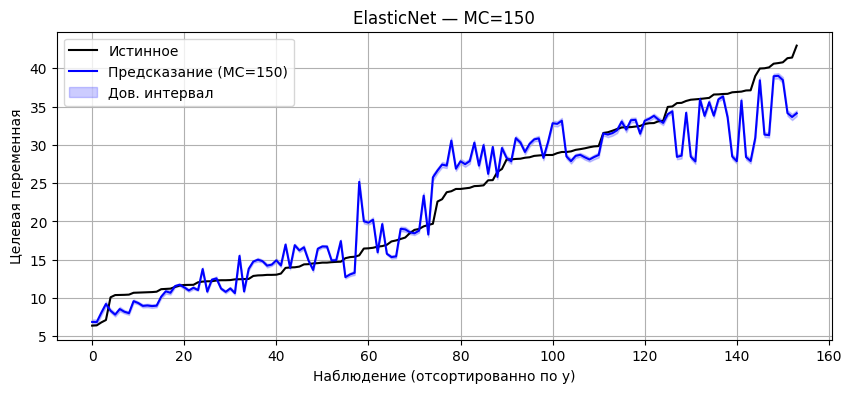

Модель: CatBoost
  Без MC -- MSE: 0.12, R²: 1.00


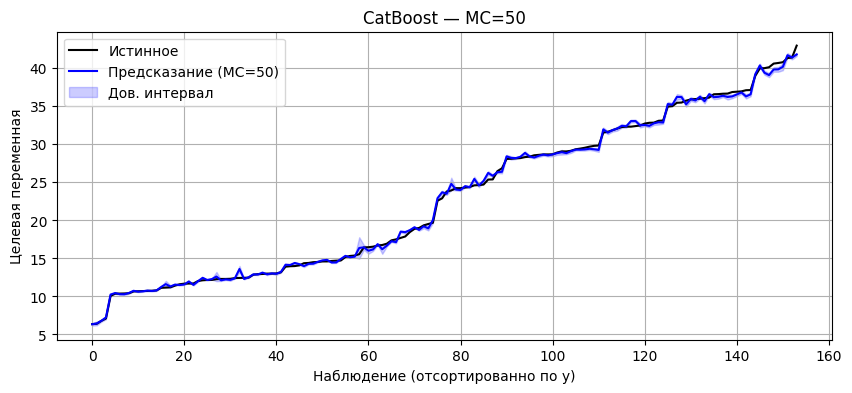

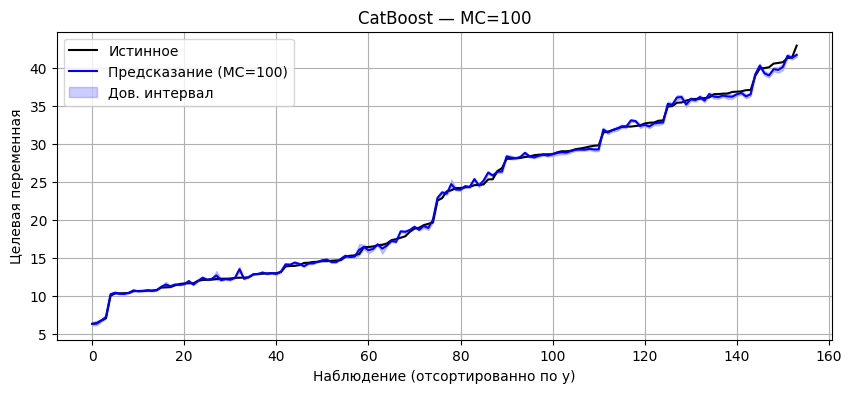

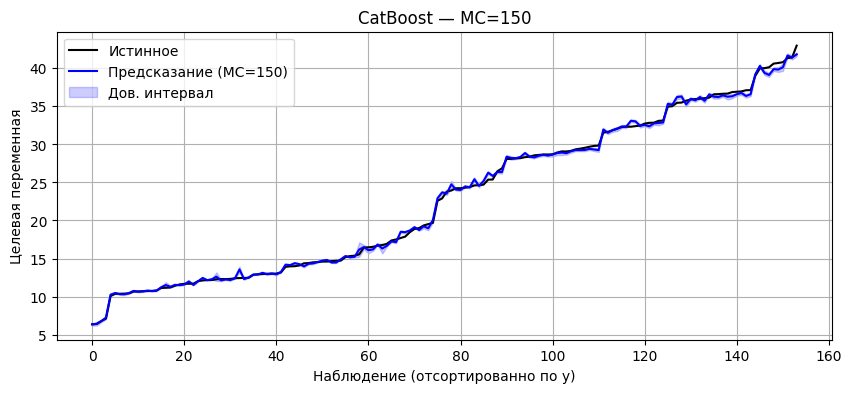

Модель: XGBoost
  Без MC -- MSE: 0.17, R²: 1.00


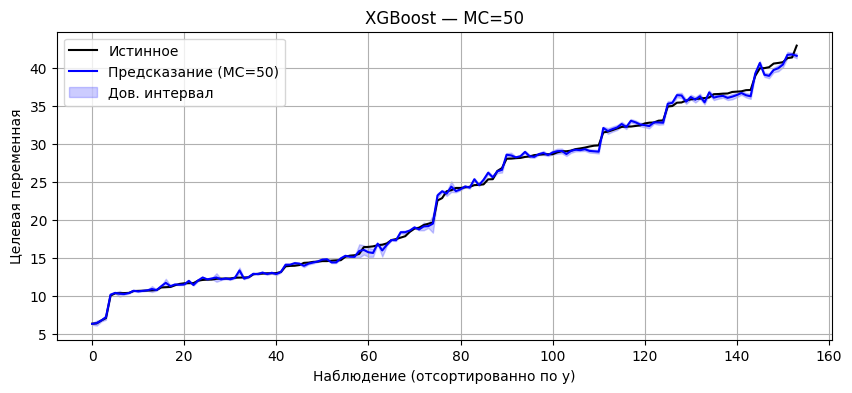

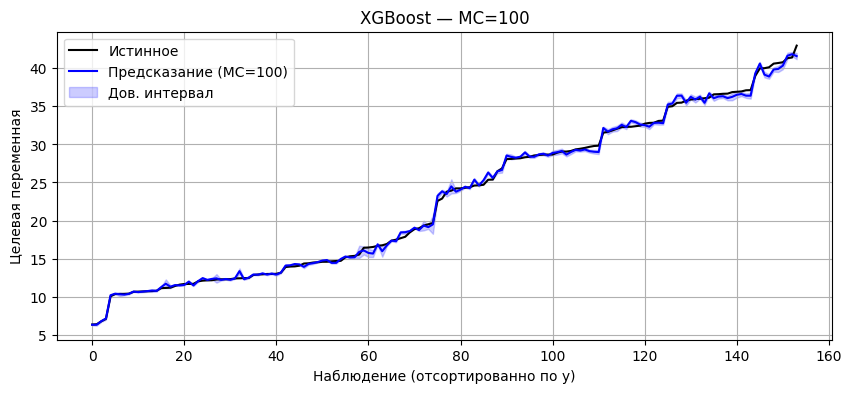

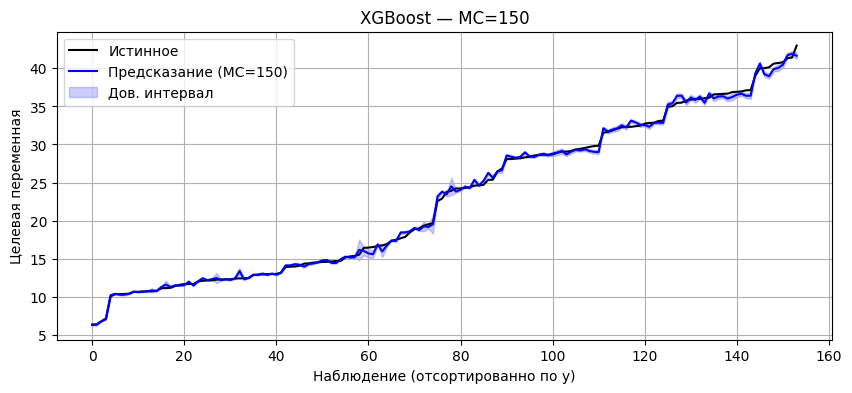

Модель: GradientBoosting
  Без MC -- MSE: 0.26, R²: 1.00


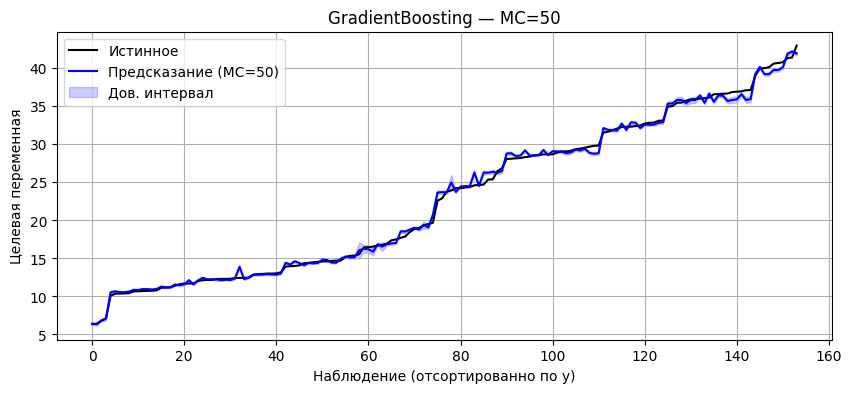

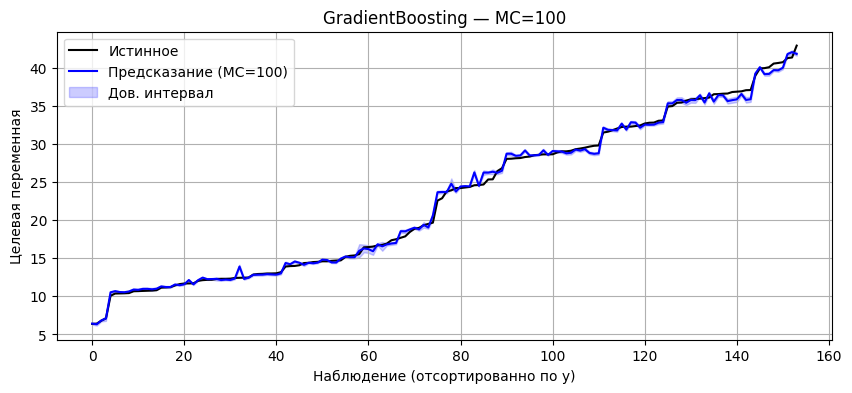

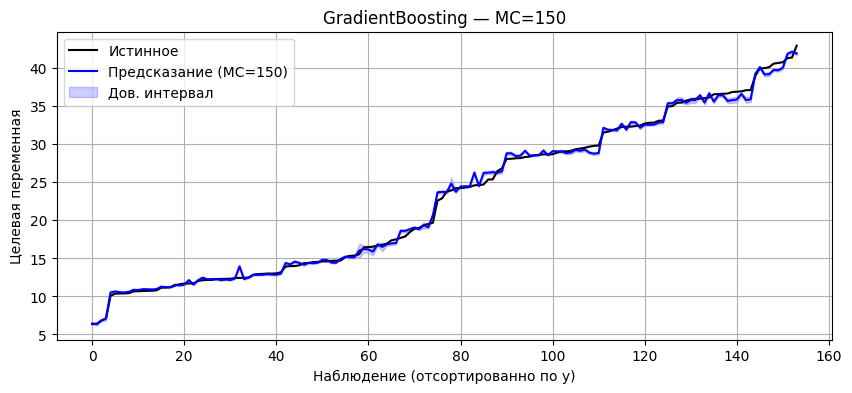

Модель: Ridge
  Без MC -- MSE: 9.21, R²: 0.91


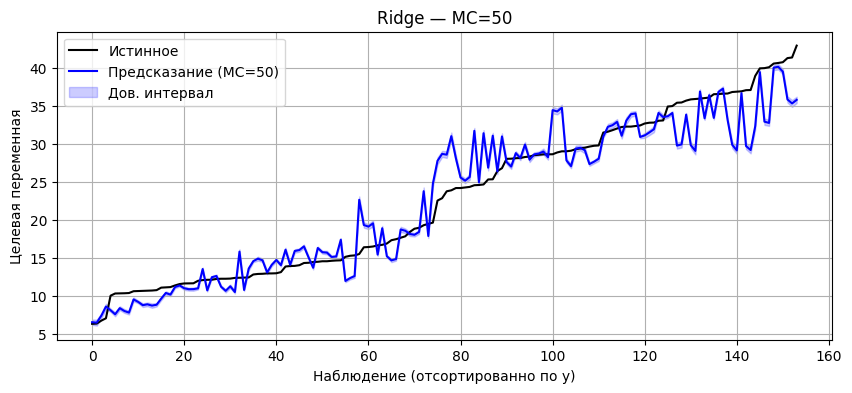

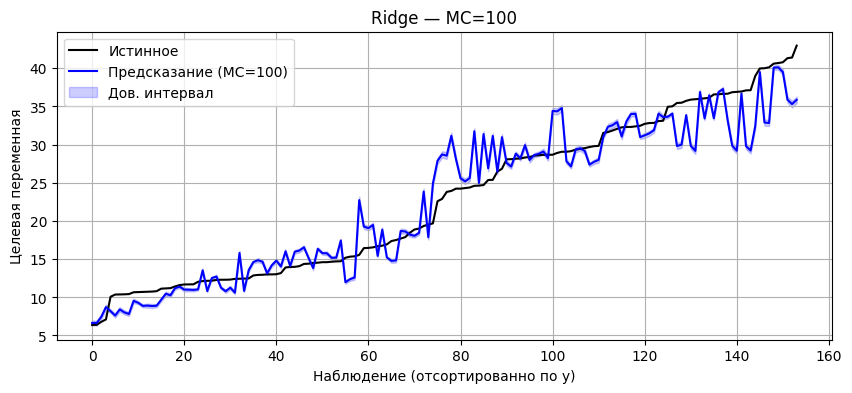

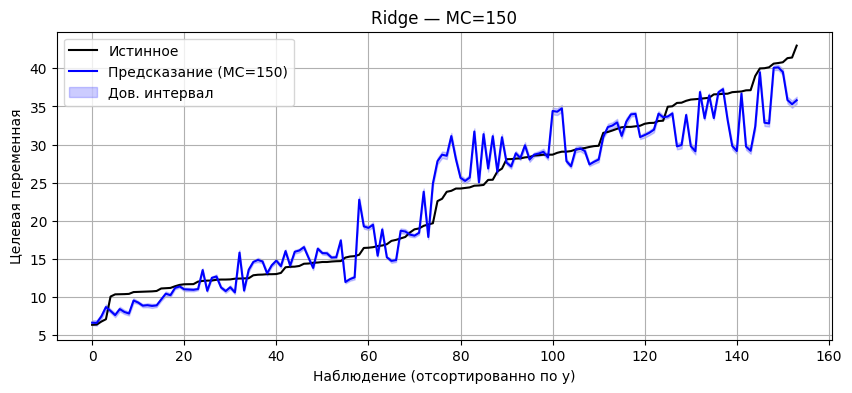

Модель: Lasso
  Без MC -- MSE: 9.94, R²: 0.90


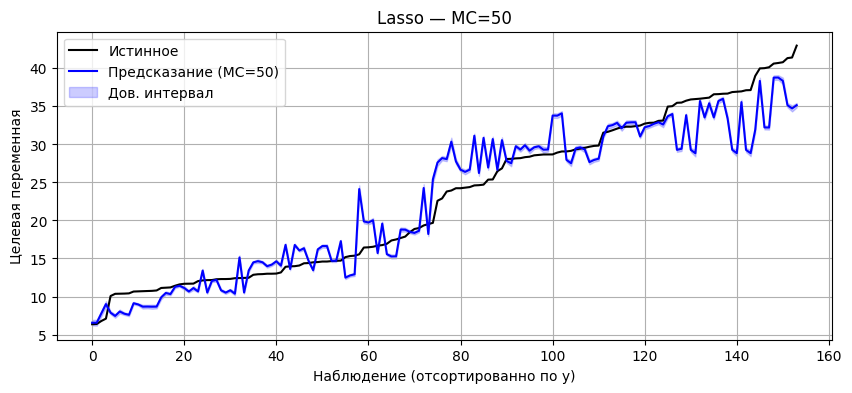

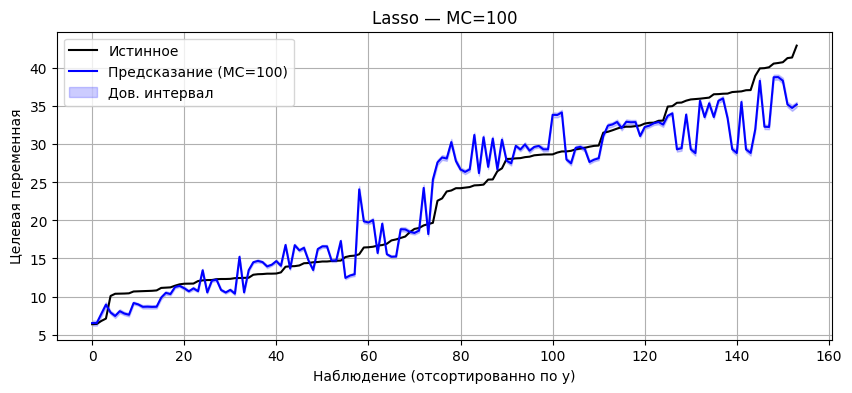

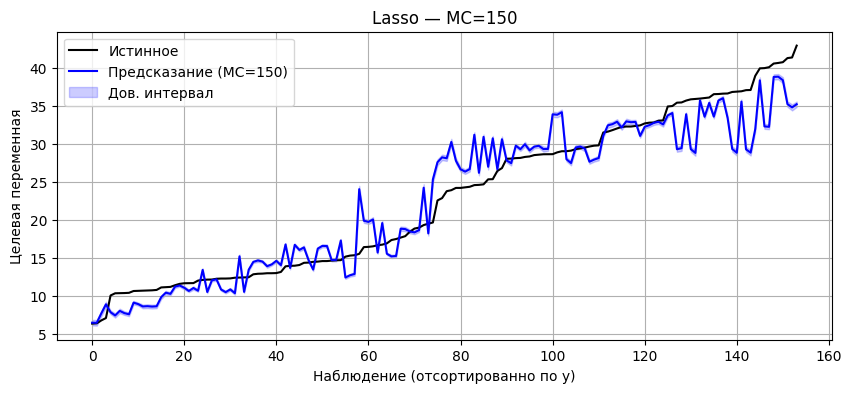

In [14]:
print(f"\n\n=== Датасет: {"energy".upper()} ===")
X_train, X_test, y_train, y_test = load_and_preprocess("energy")

for name, model in models.items():
    df_result = evaluate_model(name, model, X_train, y_train, X_test, y_test, sims=[50, 100, 150])
    df_result["Датасет"] = "energy"
    all_results.append(df_result)

In [15]:
# Общая таблица результатов
results_df = pd.concat(all_results)
pivot = results_df.pivot_table(index=["Датасет", "Модель"], columns="MC Симуляций", values=["MSE", "R²"])
pivot

MSE                              \
MC Симуляций                          50            100           150   
Датасет    Модель                                                       
california CatBoost          1.978566e+09  1.975555e+09  1.976562e+09   
           ElasticNet        5.613378e+09  5.607952e+09  5.612271e+09   
           GradientBoosting  2.901456e+09  2.902448e+09  2.906321e+09   
           Lasso             5.537897e+09  5.544363e+09  5.547307e+09   
           Ridge             5.549659e+09  5.558265e+09  5.543089e+09   
           XGBoost           2.235346e+09  2.226457e+09  2.230238e+09   
diabetes   CatBoost          2.684093e+03  2.724711e+03  2.691071e+03   
           ElasticNet        2.876802e+03  2.878754e+03  2.856738e+03   
           GradientBoosting  2.786452e+03  2.765800e+03  2.728144e+03   
           Lasso             2.881856e+03  2.877553e+03  2.874076e+03   
           Ridge             2.899923e+03  2.885497e+03  2.863901e+03   
           XGBoost           2.944536e+03  2.956773e+03  2.953490e+03   
energy     CatBoost          1.411210e-01  1.395419e-01  1.349936e-01   
           ElasticNet        1.081380e+01  1.082415e+01  1.082782e+01   
           GradientBoosting  2.647005e-01  2.625716e-01  2.628941e-01   
           Lasso             9.901995e+00  9.867117e+00  9.865946e+00   
           Ridge             9.213400e+00  9.201217e+00  9.216193e+00   
           XGBoost           1.684838e-01  1.697910e-01  1.661621e-01   

                                   R²                      
MC Симуляций                      50        100       150  
Датасет    Модель                                          
california CatBoost          0.849012  0.849241  0.849164  
           ElasticNet        0.571632  0.572046  0.571716  
           GradientBoosting  0.778584  0.778508  0.778213  
           Lasso             0.577392  0.576898  0.576674  
           Ridge             0.576494  0.575837  0.576995  
           XGBoost           0.829416  0.830095  0.829806  
diabetes   CatBoost          0.493391  0.485724  0.492074  
           ElasticNet        0.457018  0.456649  0.460805  
           GradientBoosting  0.474071  0.477969  0.485076  
           Lasso             0.456064  0.456876  0.457532  
           Ridge             0.452654  0.455377  0.459453  
           XGBoost           0.444233  0.441924  0.442543  
energy     CatBoost          0.998646  0.998661  0.998705  
           ElasticNet        0.896253  0.896154  0.896118  
           GradientBoosting  0.997460  0.997481  0.997478  
           Lasso             0.905001  0.905335  0.905347  
           Ridge             0.911607  0.911724  0.911580  
           XGBoost           0.998384  0.998371  0.998406

C:\Users\aquar\AppData\Local\Temp\ipykernel_11084\83950090.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=results_df, x="Модель", y="R²", hue="Датасет", ci="sd")


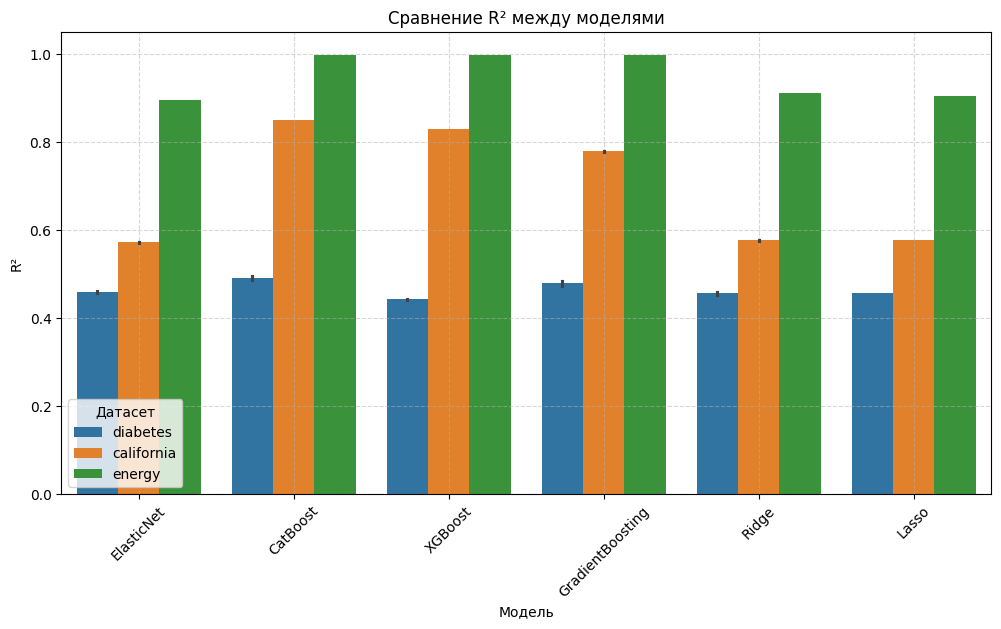

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x="Модель", y="R²", hue="Датасет", ci="sd")
plt.title("Сравнение R² между моделями")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# Выводы:

## California Housing
* CatBoost и XGBoost — лучшие по MSE (~2e+9) и R² (~0.85 и 0.83). GradientBoosting также показывает хорошие результаты (R² ~0.78). 
* Линейные модели * (Ridge, Lasso, ElasticNet) заметно уступают: MSE > 5e+9, R² ~0.57.

* Бустинговые модели явно превосходят линейные. Это логично, так как данные сложные и содержат нелинейные зависимости.

## Diabetes
* Все модели показывают умеренную точность (R² ~0.44–0.49).
* CatBoost и GradientBoosting лидируют по MSE и R², но отрыв небольшой.
* ElasticNet, Ridge и Lasso — чуть хуже, но стабильны.

* Из-за малого объёма и относительно линейной структуры данных линейные модели работают сопоставимо с бустингом.

## Energy Efficiency
* CatBoost, XGBoost и GradientBoosting показывают идеальые результаты: MSE ~0.13–0.26 R² ~0.997–0.999
* ElasticNet, Ridge, Lasso сильно отстают по точности: MSE ~9–10, R² ~0.89–0.91

* Данные идеально ложатся на бустинговые модели. Это показывает, что есть чёткие нелинейные зависимости между признаками и целевой переменной.

## Влияние числа симуляций

* Увеличение количества симуляций (50 → 150) не даёт скачка в качестве, но слегка снижает разброс.
* На Energy видна лёгкая стабилизация при 150 симуляциях.

## Общие выводы
* CatBoost наиболее стабильная и точная во всех трёх датасетах, XGBoost очень близок по качеству, иногда чуть хуже CatBoost
* GradientBoosting также конкурентоспособен, особенно на Energy
* Линейные модели на простых или малых данных (Diabetes) -- приемлемы, но в целом уступают другим модлям, выигывая лишь в скорости и простоте